# Twitter Sentiment Analysis

Twitter Sentiment Analysis is the process of computationally identifying and categorizing tweets expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral.

[Source link](https://thecleverprogrammer.com/2020/06/13/twitter-sentiment-analysis/#google_vignette)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords

## Loading the dataset

In [2]:
pd.read_csv("data/Sentiment.csv").head(1)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito


In [3]:
df = pd.read_csv("data/Sentiment.csv", index_col="id")
df.head()

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
id,,,,,,,,,,,,,,,,,,,,
1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


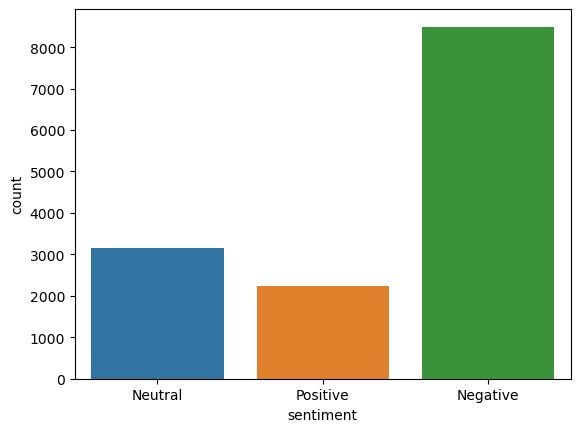

In [4]:
sns.countplot(df, x="sentiment");

### Select useful columns: 'text' and 'sentiment'

In [5]:
df = df[["text", "sentiment"]]
df.head()

,text,sentiment
id,,
1,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
2,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
3,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
4,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


For this particular analysis we dropped the neutral tweets, as the goal was to only differentiate positive and negative tweets.

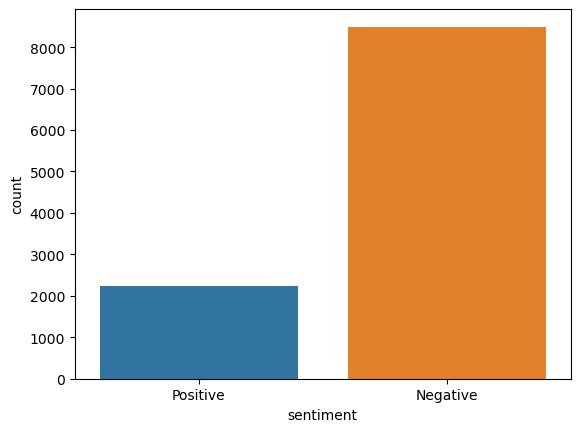

In [6]:
df = df[df["sentiment"] != "Neutral"]
sns.countplot(df, x="sentiment");

## Cleaning the dataset

The regex pattern used in this line has multiple parts separated by the | character, representing different patterns to be substituted:
- `(@[A-Za-z0-9]+)`: This pattern matches Twitter usernames or handles, starting with the @ symbol, followed by alphanumeric characters.
- `([^0-9A-Za-z \t])`: This pattern matches any character that is not alphanumeric, whitespace, or a tab.
- `(\w+:\/\/\S+)`: This pattern matches URLs starting with http:// or https://, followed by any non-whitespace characters.
- `^rt`: This pattern matches the string "rt" at the beginning of a line, which is often used in retweets.
- Removing all STOPWORDS from the text.

### Cleaning function

In [7]:
import re
stop_words = []
for w in stopwords.words("english"):
    w = re.sub(r"[^A-Za-z0-9 \t]", " ", w)
    stop_words.append(w)
stop_words = set(stop_words)

def clean_text(text: str) -> str:
    pattern = r"(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^A-Za-z0-9 \t])|^rt|(\w+:\/\/\S+)"

    text = text.lower()
    text = re.sub(pattern=pattern, repl=" ", string=text)
    text = re.sub(" +", " ", text)
    text = text.strip()
    text = " ".join(
        [word for word in text.split() if word not in stop_words]
    )
    return text

In [8]:
clean_df = df.copy()
clean_df["text"] = clean_df["text"].apply(clean_text)
clean_df.head()

,text,sentiment
id,,
2,catch full last night scott best lines 90 seconds,Positive
4,carly fiorina trending hours debate men comple...,Positive
5,w delivered highest ratings history presidenti...,Positive
6,tx first day rescind every illegal executive a...,Positive
7,liked happy heard going moderator anymore,Negative


Compare one example

In [9]:
df.iloc[4, 0]

'RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…'

In [10]:
clean_df.iloc[4, 0]

'liked happy heard going moderator anymore'

## Handling Imbalanced data

In [11]:
clean_df["sentiment"].value_counts()

sentiment
Negative    8493
Positive    2236
Name: count, dtype: int64

In [12]:
from sklearn.utils import resample

majority_df = clean_df[clean_df["sentiment"] == "Negative"]
minority_df = clean_df[clean_df["sentiment"] == "Positive"]

minority_upsampled = resample(
    minority_df,
    replace=True,
    n_samples=len(majority_df),
    random_state=123,
)

upsampled_df = pd.concat([minority_upsampled, majority_df])
upsampled_df["sentiment"].value_counts()

sentiment
Positive    8493
Negative    8493
Name: count, dtype: int64

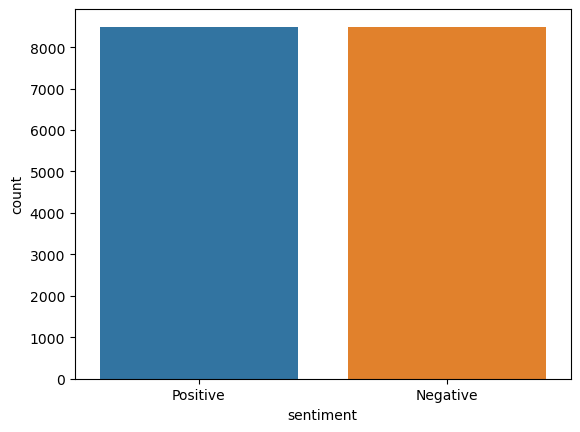

In [13]:
sns.countplot(upsampled_df, x="sentiment");

## Matrix of features and labels

In [14]:
X = upsampled_df["text"].values
y = upsampled_df["sentiment"].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (16986,)
y (16986,)


## Splitting the dataset to train and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (12739,)
X_test  (4247,)
y_train (12739,)
y_test  (4247,)


## Training the model with a pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([
    ("vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("nb", SGDClassifier()),
])


model = pipeline_sgd.fit(X_train, y_train)

## Predicting the test set

In [17]:
y_pred = pipeline_sgd.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,Negative,Positive
1,Negative,Negative
2,Negative,Negative
3,Positive,Positive
4,Positive,Positive
5,Positive,Positive
6,Positive,Positive
7,Positive,Positive
8,Positive,Negative
9,Positive,Positive


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      2119
    Positive       0.86      0.90      0.88      2128

    accuracy                           0.88      4247
   macro avg       0.88      0.88      0.88      4247
weighted avg       0.88      0.88      0.88      4247



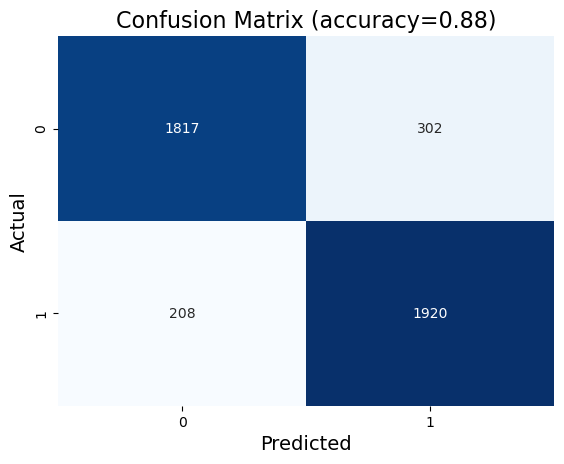

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Live prediction

In [19]:
def live_prediction(tweet):
    tweet = clean_text(tweet)
    X_example = np.array([tweet], dtype="object")
    prediction = pipeline_sgd.predict(X_example)
    print(f"Example tweet:\n{tweet!r}")
    if prediction[0] == "Positive":
        print("This tweet has 'Positive Sentiment'")
    else:
        print("This tweet has 'Negative Sentiment'")
    print("-" * 50)

In [20]:
hate_tweet_example = X_test[y_test == "Positive"][100]
live_prediction(hate_tweet_example)

hate_tweet_example = X_test[y_test == "Negative"][100]
live_prediction(hate_tweet_example)

Example tweet:
'italian american appreciate walker ability talk hands nicest thing say'
This tweet has 'Positive Sentiment'
--------------------------------------------------
Example tweet:
'chris wallace ask politicans finances money comes'
This tweet has 'Negative Sentiment'
--------------------------------------------------
